In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urljoin
from tqdm import tqdm_notebook
import pandas as pd
import urllib

page =urlopen("https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190526")
soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20190526" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [2]:
date = pd.date_range('2019-4-24', periods=100, freq='D')

In [12]:
movie_date =[]
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date = 
                                  urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "lxml")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0,end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0,end)])
    movie_point.extend([float(soup.find_all('td', 'point')[n].string) for n in range(0,end)])
                        
movie_data_all = pd.DataFrame({'date':movie_date,'name':movie_name, 'point':movie_point})
movie_data_all.to_csv('../data/movie_data_all.csv', sep =',', encoding = 'utf-8')
movie_data_all.head()

,date,name,point
0,2019-04-24,그린 북,9.62
1,2019-04-24,가버나움,9.60
2,2019-04-24,베일리 어게인,9.55
3,2019-04-24,어벤져스: 엔드게임,9.49
4,2019-04-24,로망,9.36


In [4]:
a = pd.DataFrame(movie_data_all.groupby('name').count())
top5 = list(a.sort_values('point', ascending=False).head(5).index)

# 하나의 데이터만 추출하여, 평점변화 추이 살펴보기

In [5]:
avengers = movie_data_all[movie_data_all['name'] == '어벤져스: 엔드게임']

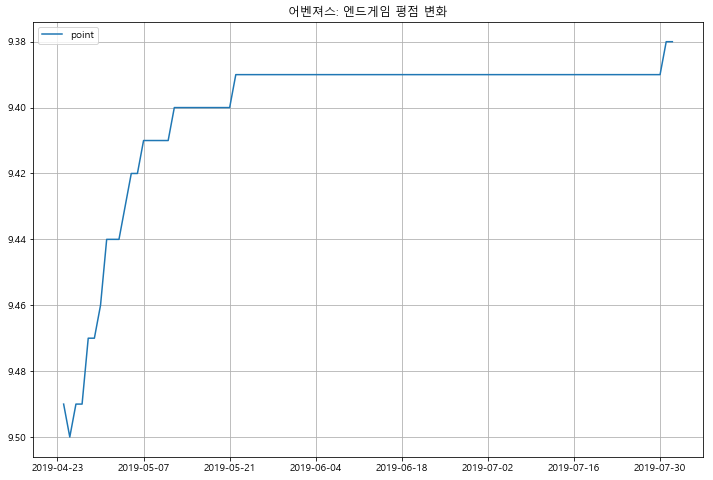

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system. sorry~~~')
import seaborn as sns

plt.figure(figsize=(12,8))
plt.title('%s 평점 변화'%(avengers.iloc[0,1]))
ax = plt.plot(avengers['date'], avengers['point'])
plt.legend(loc = 'best')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

# 추출한 데이터에서, 가장 평점 갯수가 많은 top5 전체 그래프 출력

In [7]:
movie_pivot = pd.pivot_table(movie_data_all, index=["date"], columns=['name'], values=['point'])
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.to_csv('../data/movie_pivot.csv', sep = ',', encoding = 'utf-8')

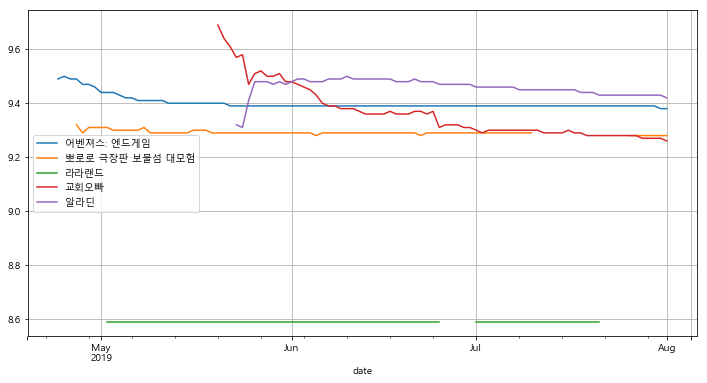

In [11]:
movie_pivot.plot(y = top5, figsize=(12,6))
plt.legend(loc='best')
plt.grid()
plt.show()